In [5]:
%load_ext autoreload
%autoreload 2

import os

SEED = 42

head, tail = os.path.split(os.getcwd())
if tail == "notebooks": os.chdir(head)

import src.plots as plots
import src.tools as tools

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
X, y = tools.load_data("data/processed/v1_var_desync0_clean01.h5")

In [7]:
import numpy as np
from scipy import stats

ALPHA = 0.05

stat, pval = stats.f_oneway(*(X[y == b] for b in np.unique(y)), axis=0)
print(f"Features rejecting the null hypothesis (alpha={ALPHA}):", np.sum(pval < ALPHA))

Features rejecting the null hypothesis (alpha=0.05): 65


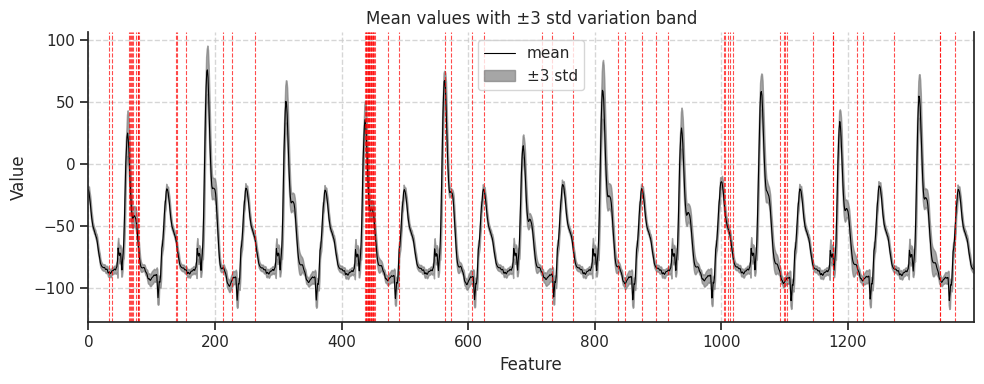

In [8]:
fig = plots.plot_mean(X, sd=3, figsize=(10, 4))
ax = fig.gca()

for i in np.where(pval < ALPHA)[0]:
    ax.axvline(i, color="red", linestyle="--", linewidth=0.8, alpha=0.7)

idx = np.where(pval < ALPHA)[0]
fig.savefig("figures/mean_trace_anova.png", dpi=300)

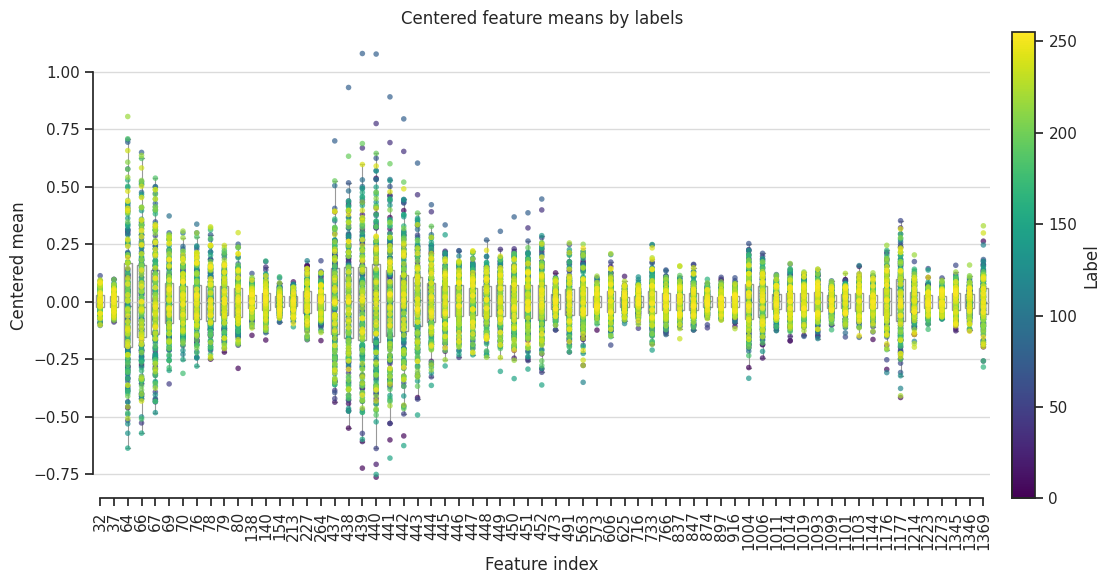

In [9]:
fig = plots.plot_feature_means(X, y, idx, figsize=(12, 6))
fig.savefig("figures/feature_means.png", dpi=300)